**ECO 5100 Introductory Statistics and Econometrics (Fall 2019)**

**Regression - Height and Wages**

Persico, Postlewaite, and Silverman (2004) analyzed data from the National Longitudinal
Survey of Youth (NLSY) 1979 cohort to assess the relationship between height and
wages for white men. Here we explore the relationship between height and wages for the
full sample, which includes men and women and all races. The NLSY is a nationally
representative sample of 12,686 young men and women who were 14 to 22 years old
when first surveyed in 1979. These individuals were interviewed annually through 1994
and biannually after that.

In a 2004 article published in the Journal of Political Economy, Nicola Persico, Andrew Postlewaite, and Dan Silverman analyzed data from the National Longitudinal Survey of Youth (NLSY) 1979 cohort to assess the relationship between height and wages for white men. The NLSY is a nationally representative sample of 12,686 young men and women who were 14–22 years old when they were first surveyed in 1979. These individuals were interviewed annually through 1994 and biannually since then. This data set selected study variables based on the NLSY data. 

**HeightWage_MenWomenUS_HW data**

**male**:	Male (1 = yes, 0 = no)

**white**:	White (1 = yes, 0 = no)

**black**:	Black (1 = yes, 0 = no)

**hispanic**:	Hispanic (1 = yes, 0 = no)

**wage96**:	Adult hourly wages (dollars) reported in 1996 (salary and wages in past calendar year divided by hours worked in past calendar year)

**height85**:	Adult height (inches), self-reported in 1985 

**height81**:	Adolescent height (inches), self-reported in 1981 

**athlets**:	Participation in high school

**athletics** (1 = yes, 0 = no)

**clubnum**:	Number of club memberships in high school, excluding athletics, academic/honor society clubs, and vocational clubs

**momed79**:	Mother’s years of education

**daded79**:	Father’s years of education

**mompro2**:	Mother in a professional/managerial occupation (1 = yes, 0 = no)

**poppro2**:	Father in a professional/managerial occupation (1 = yes, 0 = no)

**siblings**: 	Number of siblings

**age**:	Age (years) in 1996

**esteem80**:	Score on Rosenberg Self-Esteem Scale as an adolescent in 1980 (higher values indicate higher self-esteem)

**hgc96**:	Highest grade of education completed in 1996

**REGION**	

**norest96**:	Northeast (1 = yes, 0 = no)

**norcen96**:	North Central (1 = yes, 0 = no)

**south96**:	South (1 = yes, 0 = no)

**west96**:	West (1 = yes, 0 = no)



In [0]:
import pandas as pd
file = "https://github.com/VitorKamada/ECO5100/raw/master/Data/HeightWage_MenWomenUS_HW.csv" 
df = pd.read_csv(file)

In [2]:
df.head()

,male,white,black,hispanic,mompro2,poppro2,siblings,norest96,norcen96,south96,west96,height81,height85,esteem80,athlets,wage96,hgc96,daded79,momed79,age,clubnum
0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
1,0,1,0,0,0,0,8,1.0,0.0,0.0,0.0,62.0,62.0,20.0,0.0,NaN,12.0,8.0,5.0,37.0,2.0
2,0,1,0,0,0,0,3,0.0,0.0,0.0,1.0,NaN,70.0,24.0,0.0,NaN,12.0,12.0,10.0,34.0,0.0
3,0,1,0,0,0,0,3,0.0,0.0,0.0,1.0,67.0,67.0,NaN,0.0,14.632107,14.0,12.0,11.0,33.0,0.0
4,1,1,0,0,0,0,1,NaN,NaN,NaN,NaN,63.0,NaN,23.0,0.0,NaN,NaN,12.0,12.0,NaN,2.0


(a)	Create a scatterplot of adult wages against adult height. What does this plot suggest about the relationship between height and wages?

The scatterplot is below, jittered to help us see individual observations. It’s pretty hard to see a relationship. One concern may be the existence of a few outliers that could affect the results, particularly the one observation with an hourly wage exceeding $700. There are also a few extreme values of height, suggesting the possibility of some measurement error.

Text(0, 0.5, 'Hourly Wage in 1986')

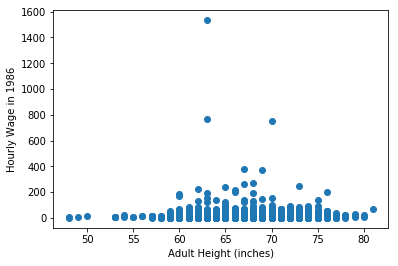

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df["height85"], df["wage96"])
plt.xlabel('Adult Height (inches)')
plt.ylabel('Hourly Wage in 1986')

(b)	Estimate an OLS regression in which adult wages is regressed on adult height for all respondents. Report the estimated regression equation and interpret the results, explaining in particular what the p value means.

The regression suggests that a 1-inch increase in adult height is associated with an increase of $0.31 in hourly wages. That’s not bad, especially when considered over the course of many years. The p value indicates that there is a 0.00 probability of observing a coefficient as high as we actually do if the true value were zero (given the estimated standard error). There is not literally a 0 percent chance, but with rounding we can say it is zero to three decimal points.

In [0]:
import numpy as np            
df['const'] = 1

In [5]:
import statsmodels.api as sm
naive = sm.OLS(df['wage96'], df[['const', 'height85']],
                    missing='drop').fit()
print(naive.summary())

                            OLS Regression Results                            
Dep. Variable:                 wage96   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     14.59
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           0.000135
Time:                        01:40:50   Log-Likelihood:                -31816.
No. Observations:                6713   AIC:                         6.364e+04
Df Residuals:                    6711   BIC:                         6.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9768      5.559     -1.255      0.2

(c)	Assess whether the null hypothesis that the coefficient on height81 equals 0 is rejected at the 0.05 significance level for one-sided and for two-sided hypothesis tests.

For a one-sided hypothesis test at the 0.05 significance level we reject the null hypothesis because the (absolute value of the) t statistic is greater than 1.64, which is the critical value for such a test.
For a two-sided hypothesis test at the 0.05 significance level we reject the null hypothesis because the (absolute value of the) t statistic is greater than 1.96, which is the critical value for such a test. 


(d)	Estimate an OLS regression in which adult wages is regressed on adult height and adolescent height for all respondents. Discuss differences across this model and  item (b). Explain why the coefficient on adult height changed.

The results are given below. In the model with only adult height, there is a strong relationship between height and wages. When we add adolescent height, however, the coefficient on adult height becomes negative and statistically insignificant (with a p value of 0.66). The coefficient on adolescent height is not statistically significant at alpha = 0.05 (but is significant at alpha = 0.10).
We can explain the change in coefficient on adult height using the logic of omitted variable bias. Adult height and adolescent height are correlated and it appears adolescent height has a direct effect on wages. Hence, when only adult height was in the model, the coefficient on adult height was inflated by the fact that adult height is correlated with adolescent height and adolescent height (the omitted variable) has an effect on wages.


In [6]:
import statsmodels.api as sm
Reg1 = sm.OLS(df['wage96'], df[['const', 'height85','height81']],
                    missing='drop').fit()
print(Reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 wage96   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.873
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           0.000142
Time:                        01:40:50   Log-Likelihood:                -31302.
No. Observations:                6594   AIC:                         6.261e+04
Df Residuals:                    6591   BIC:                         6.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2483      5.775     -1.601      0.1

(e)	Note that IQ is omitted from the model. Is this a problem? Why or why not?

Omitted variable bias occurs if (a) the omitted variable affects the dependent variable and (b) the variable in question is correlated with the omitted variable. Part (a) is highly plausible in this case because intelligence probably helps raise wages. Part (b) is more debatable. There is no obvious correlation between height and intelligence. A quick trip to Wikipedia (http://en.wikipedia.org/wiki/Height_and_intelligence/) indicates some evidence of a small positive correlation. So, yes, this could be a problem and would bias the coefficient on height upward, but the magnitude of omitted variable depends on the magnitude of the correlation so this is unlikely to be a devastating problem.

(f)	Note that eye color is omitted from the model. Is this a problem? Why or why not?

As noted in the answer to part (c), omitted variable bias occurs if (a) the omitted variable affects the dependent variable and (b) the variable in question is correlated with the omitted variable. Part (a) is unlikely to be true because the effect of eye color on wages is, at most, very small. Part (b) is also unlikely to be true, although it is possible that people from some parts of the world are more likely to have certain eye colors and be taller or shorter than the world average.